In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import Image
import seaborn as sns

# enables inline plots, without it plots don't show up in the notebook
%matplotlib inline

## Challenge 1

In [2]:
df = pd.read_csv("http://web.mta.info/developers/data/nyct/turnstile/turnstile_170506.txt")
#df_May_13 = pd.read_csv("http://web.mta.info/developers/data/nyct/turnstile/turnstile_170513.txt")

In [3]:
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/29/2017,00:00:00,REGULAR,6157740,2085315
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/29/2017,04:00:00,REGULAR,6157777,2085319
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/29/2017,08:00:00,REGULAR,6157810,2085353
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/29/2017,12:00:00,REGULAR,6157963,2085453
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/29/2017,16:00:00,REGULAR,6158212,2085529


In [9]:
df.columns.tolist()

['C/A',
 'UNIT',
 'SCP',
 'STATION',
 'LINENAME',
 'DIVISION',
 'DATE',
 'TIME',
 'DESC',
 'ENTRIES',
 'EXITS                                                               ',
 'KEY']

In [10]:
df.DATE.value_counts().sort_index()

04/29/2017    28387
04/30/2017    28041
05/01/2017    28082
05/02/2017    28165
05/03/2017    28115
05/04/2017    28494
05/05/2017    28006
Name: DATE, dtype: int64

In [4]:
df['KEY'] = df['C/A'] + ',' + df['UNIT'] + ',' + df['SCP'] + ',' + df['STATION']

In [5]:
df.dtypes

C/A                                                                     object
UNIT                                                                    object
SCP                                                                     object
STATION                                                                 object
LINENAME                                                                object
DIVISION                                                                object
DATE                                                                    object
TIME                                                                    object
DESC                                                                    object
ENTRIES                                                                  int64
EXITS                                                                    int64
KEY                                                                     object
dtype: object

## Challenge 2

In [12]:
df['DATETIME'] = pd.to_datetime(df['DATE'] + ' ' + df['TIME'],format="%m/%d/%Y %H:%M:%S")

In [13]:
df.DATETIME.head()

0   2017-04-29 00:00:00
1   2017-04-29 04:00:00
2   2017-04-29 08:00:00
3   2017-04-29 12:00:00
4   2017-04-29 16:00:00
Name: DATETIME, dtype: datetime64[ns]

In [19]:
df['TIME'] = pd.to_datetime(df['TIME'])

In [20]:
df['DATE'] = pd.to_datetime(df['DATE'])

In [17]:
df['DAY'] = df.DATETIME.dt.dayofweek

In [18]:
df.dtypes

C/A                                                                             object
UNIT                                                                            object
SCP                                                                             object
STATION                                                                         object
LINENAME                                                                        object
DIVISION                                                                        object
DATE                                                                            object
TIME                                                                            object
DESC                                                                            object
ENTRIES                                                                          int64
EXITS                                                                            int64
KEY                                        

In [13]:
df.shape

(197290, 14)

In [14]:
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,KEY,DATETIME,DAY
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2017-04-29,2017-09-19 00:00:00,REGULAR,6157740,2085315,"A002,R051,02-00-00,59 ST",2017-04-29 00:00:00,5
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2017-04-29,2017-09-19 04:00:00,REGULAR,6157777,2085319,"A002,R051,02-00-00,59 ST",2017-04-29 04:00:00,5
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2017-04-29,2017-09-19 08:00:00,REGULAR,6157810,2085353,"A002,R051,02-00-00,59 ST",2017-04-29 08:00:00,5
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2017-04-29,2017-09-19 12:00:00,REGULAR,6157963,2085453,"A002,R051,02-00-00,59 ST",2017-04-29 12:00:00,5
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2017-04-29,2017-09-19 16:00:00,REGULAR,6158212,2085529,"A002,R051,02-00-00,59 ST",2017-04-29 16:00:00,5


In [21]:
df.DESC.value_counts()

REGULAR       196599
RECOVR AUD       691
Name: DESC, dtype: int64

## Challenge 3

In [15]:
df['ENTRYCOUNT'] = df.groupby('KEY')['ENTRIES'].diff()

In [16]:
gb = df.groupby(['KEY','DATE']).sum().reset_index()

In [17]:
type(gb)

pandas.core.frame.DataFrame

In [18]:
gb.head()

,KEY,DATE,ENTRIES,EXITS,DAY,ENTRYCOUNT
0,"A002,R051,02-00-00,59 ST",2017-04-29,36948023,12512558,30,781.0
1,"A002,R051,02-00-00,59 ST",2017-04-30,36952467,12514209,36,494.0
2,"A002,R051,02-00-00,59 ST",2017-05-01,36956689,12516542,0,1359.0
3,"A002,R051,02-00-00,59 ST",2017-05-02,36965130,12519764,6,1456.0
4,"A002,R051,02-00-00,59 ST",2017-05-03,36974388,12523108,12,1424.0


## Challenge 4

In [19]:
gb2 = gb.loc[gb.KEY == 'A002,R051,02-00-00,59 ST']

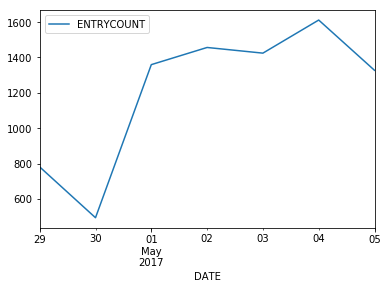

In [20]:
gb2.plot(x='DATE',y='ENTRYCOUNT')

In [21]:
gb.columns

Index(['KEY', 'DATE', 'ENTRIES',
       'EXITS                                                               ',
       'DAY', 'ENTRYCOUNT'],
      dtype='object')

## Challenge 5

In [22]:
turnstiles = df.groupby(['C/A', 'UNIT', 'STATION','DATE']).ENTRYCOUNT.sum().reset_index()

In [23]:
type(turnstiles)

pandas.core.frame.DataFrame

In [24]:
turnstiles.head()

,C/A,UNIT,STATION,DATE,ENTRYCOUNT
0,A002,R051,59 ST,2017-04-29,7717.0
1,A002,R051,59 ST,2017-04-30,7098.0
2,A002,R051,59 ST,2017-05-01,13299.0
3,A002,R051,59 ST,2017-05-02,14731.0
4,A002,R051,59 ST,2017-05-03,15131.0


## Challenge 6

In [25]:
station = df.groupby(['STATION','DATE']).ENTRYCOUNT.sum().reset_index()

In [26]:
station.head()

,STATION,DATE,ENTRYCOUNT
0,1 AV,2017-04-29,14595.0
1,1 AV,2017-04-30,15440.0
2,1 AV,2017-05-01,20979.0
3,1 AV,2017-05-02,22743.0
4,1 AV,2017-05-03,23258.0


In [27]:
station1 = station.loc[station.STATION == '1 AV']

In [28]:
type(station1)

pandas.core.frame.DataFrame

In [29]:
#firstAveGroup = station.groupby('DATE')

In [30]:
#firstAveGroup.plot(x=firstAveGroup.indices,y='ENTRYCOUNT')

## Challenge 7

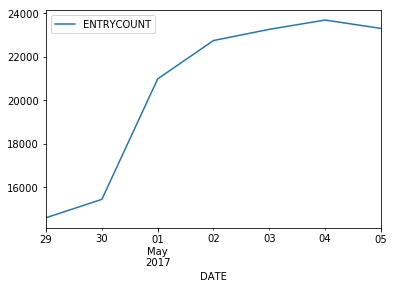

In [31]:
station1.plot(y='ENTRYCOUNT',x='DATE')

## Top 5 Stations based on Entries

In [105]:
top5stations = df.groupby('STATION').ENTRYCOUNT.sum().reset_index()

In [106]:
#top5stations = top5stations.sort_values('ENTRYCOUNT',ascending=False)

In [108]:
top5stations.loc[top5stations.STATION == 'EASTCHSTER/DYRE']

,STATION,ENTRYCOUNT
207,EASTCHSTER/DYRE,1.557721e+09


In [109]:
df.loc[df.STATION == 'EASTCHSTER/DYRE']

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,KEY,DATETIME,DAY,ENTRYCOUNT
195279,R730,R431,00-00-00,EASTCHSTER/DYRE,5,IRT,2017-04-29,01:00:00,REGULAR,1334708,2553276,"R730,R431,00-00-00,EASTCHSTER/DYRE",2017-04-29 01:00:00,5,NaN
195280,R730,R431,00-00-00,EASTCHSTER/DYRE,5,IRT,2017-04-29,05:00:00,REGULAR,1334708,2553279,"R730,R431,00-00-00,EASTCHSTER/DYRE",2017-04-29 05:00:00,5,0.000000e+00
195281,R730,R431,00-00-00,EASTCHSTER/DYRE,5,IRT,2017-04-29,09:00:00,REGULAR,1334708,2553279,"R730,R431,00-00-00,EASTCHSTER/DYRE",2017-04-29 09:00:00,5,0.000000e+00
195282,R730,R431,00-00-00,EASTCHSTER/DYRE,5,IRT,2017-04-29,13:00:00,REGULAR,1334708,2553279,"R730,R431,00-00-00,EASTCHSTER/DYRE",2017-04-29 13:00:00,5,0.000000e+00
195283,R730,R431,00-00-00,EASTCHSTER/DYRE,5,IRT,2017-04-29,17:00:00,REGULAR,1334708,2553279,"R730,R431,00-00-00,EASTCHSTER/DYRE",2017-04-29 17:00:00,5,0.000000e+00
195284,R730,R431,00-00-00,EASTCHSTER/DYRE,5,IRT,2017-04-29,21:00:00,REGULAR,1334708,2553279,"R730,R431,00-00-00,EASTCHSTER/DYRE",2017-04-29 21:00:00,5,0.000000e+00
195285,R730,R431,00-00-00,EASTCHSTER/DYRE,5,IRT,2017-04-30,01:00:00,REGULAR,1334708,2553279,"R730,R431,00-00-00,EASTCHSTER/DYRE",2017-04-30 01:00:00,6,0.000000e+00
195286,R730,R431,00-00-00,EASTCHSTER/DYRE,5,IRT,2017-04-30,05:00:00,REGULAR,1334708,2553279,"R730,R431,00-00-00,EASTCHSTER/DYRE",2017-04-30 05:00:00,6,0.000000e+00
195287,R730,R431,00-00-00,EASTCHSTER/DYRE,5,IRT,2017-04-30,09:00:00,REGULAR,1334708,2553279,"R730,R431,00-00-00,EASTCHSTER/DYRE",2017-04-30 09:00:00,6,0.000000e+00
195288,R730,R431,00-00-00,EASTCHSTER/DYRE,5,IRT,2017-04-30,13:00:00,REGULAR,1334708,2553280,"R730,R431,00-00-00,EASTCHSTER/DYRE",2017-04-30 13:00:00,6,0.000000e+00


In [34]:
df.ENTRYCOUNT.min()

-20235064.0